In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import streamlit as st
import altair as alt

In [7]:
X, y = make_regression(n_samples=100, n_features=10)
X.shape, y.shape

((100, 10), (100,))

In [57]:
old = range(11)
new = ["y"] +["w"+str(i) for i in range(11)]
data = np.concatenate((y.reshape(-1,1),X),axis=1)
df = (pd.DataFrame(data)
      .rename(columns=dict(zip(old,new)))
     )
df = df.reset_index()
df.head()

,index,y,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9
0,0,-131.963935,-1.423734,1.043946,0.873535,-1.740295,-0.428160,-0.931969,0.385416,-1.140647,1.843175,-1.335734
1,1,-65.084316,0.517331,0.888159,-1.270958,0.865882,0.536207,0.410502,3.055253,-1.300677,-1.568446,1.223738
2,2,-180.917938,-1.094402,-1.183701,-0.847322,-0.451545,0.558620,-0.031806,0.797951,-0.826799,0.646991,-1.048532
3,3,-53.766117,0.693587,2.369455,-1.334663,0.484838,-0.575442,1.016653,-0.227464,-0.343171,-1.453397,-2.618691
4,4,10.552226,-0.064292,-0.389148,-0.793553,-0.453715,0.690703,0.557553,-0.076780,0.806071,-1.281530,0.192530


In [65]:
chart1 = alt.Chart(df).mark_point(color="red").encode(
    alt.X('w1',title='Umsatz'),
    alt.Y("y"),
)
chart2 = alt.Chart(df).mark_line().encode(
    x = "w1",
    y = "y"
)

In [71]:
st.altair_chart(chart1)

In [39]:
X.shape, y.shape

((100, 10), (100,))

In [53]:
b = 2
w = 1.8
x = np.random.random(10000)
y = b + w*x + np.random.random(10000)
x.shape, y.shape

((10000,), (10000,))

In [56]:
res = linregress(x,y)
res.stderr

0.010063518303310792

In [105]:
X_MIN = 1
X_MAX = 100
xres = 10
X_source = np.linspace(X_MIN, X_MAX, xres)

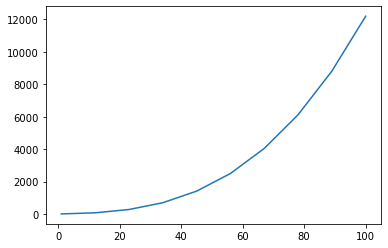

In [106]:
y1 = np.polynomial.polynomial.polyval(X_source,[0,2,0.2, 0.01])

print(plt.get_cmap("tab20"))
plt.plot(X_source,y1)


In [73]:
def make_data(X_sim,n=10):
    
    y = 100 + np.log2(X_sim)*20 + np.sin(5*X_sim) + np.random.random(n)*5*np.random.random()#*1000
    df = pd.DataFrame({"Werbung":X_sim, "Absatz":y})
    return df
n = 10
X_sim = np.linspace(1,20,10)
b0 = 100
b1 = 0
yhat = b0 + b1*X_sim
df = (make_data(X_sim,int(n))
      .assign(Yhat=yhat)
    )

In [74]:
df

,Werbung,Absatz,Yhat
0,1.000000,102.252491,100.0
1,3.111111,133.252380,100.0
2,5.222222,150.281045,100.0
3,7.333333,157.339969,100.0
4,9.444444,165.422305,100.0
5,11.555556,172.164380,100.0
6,13.666667,175.123643,100.0
7,15.777778,180.165412,100.0
8,17.888889,185.043145,100.0
9,20.000000,188.121794,100.0


In [129]:
y[0]

6.643856189774724

In [130]:
2**6.6438

99.99610529745281

In [75]:
n = 100
b0 = 50
w1 = 2.3


In [99]:
def simulate(n=100,b0=1,w1=2):
    x = np.linspace(0,1,n)
    y = b0 + w1 * x + np.random.random(n)
    yhat = b0*0.8 + w1*0.9*x
    return pd.DataFrame({"y":y, "x":x, "yhat":yhat})

In [246]:
n = 100
df = simulate(n)


In [247]:
delta = pd.concat((df,df)).reset_index(drop=True)
#delta.iloc[0:n,0] = delta.iloc[0:n,2]
#delta = delta.drop(labels="yhat",axis=1)
delta

,y,x,yhat
0,1.934106,0.000000,0.800000
1,1.801261,0.010101,0.818182
2,1.380399,0.020202,0.836364
3,1.899116,0.030303,0.854545
4,1.831796,0.040404,0.872727
...,...,...,...
195,2.923489,0.959596,2.527273
196,3.143022,0.969697,2.545455
197,3.864153,0.979798,2.563636
198,3.176353,0.989899,2.581818


In [252]:
scatter = alt.Chart(df).mark_point(color="blue").encode(
    alt.X("x"),
    alt.Y("y"),
     tooltip=["yhat", "y"]
)
line = alt.Chart(df).mark_line(color="green").encode(
    alt.X("x"),
    alt.Y("yhat"),
 
    
)
point = alt.Chart(df).mark_circle(color="black").encode(
        alt.X("x"),
        alt.Y("yhat"),   
        tooltip=["x"]
)


line2 = alt.Chart(df).mark_rule(color="black", ).encode(
        alt.X("x"),
        alt.Y("y"),
        alt.Y2("yhat"),
    scale=alt.Scale(domain=(0,100))
       
    
)

In [253]:
(scatter + line + point + line2).interactive()

SchemaValidationError: Invalid specification

        altair.vegalite.v4.api.Chart, validating 'required'

        'data' is a required property
        

alt.LayerChart(...)